In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.2/611.2 kB 17.1 MB/s eta 0:00:00


In [3]:
import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics YOLOv8.0.119 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.1/78.2 GB disk)


In [4]:
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Video


In [5]:

import os

# Define a function to get the path of the last directory in Google Drive
def get_last_directory_path():
    drive_path = '/content/drive/MyDrive/PFE_Master/video_prediction'  # Change this path as per your requirement
    directories = [os.path.join(drive_path, d) for d in os.listdir(drive_path) if os.path.isdir(os.path.join(drive_path, d))]

    if not directories:
        return None  # Return None if there are no directories in the drive path

    directories.sort(key=lambda x: os.path.getmtime(x), reverse=True)
    last_directory_path = directories[0]

    return last_directory_path

# Usage example
last_directory_path = get_last_directory_path()
print("Last directory path:", last_directory_path)



Last directory path: /content/drive/MyDrive/PFE_Master/video_prediction/predict20


In [6]:
src_image="/content/drive/MyDrive/PFE_Master/video2.mp4"
output="/content/drive/MyDrive/PFE_Master/video_prediction"
model_path="/content/drive/MyDrive/PFE_Master/Project/YOLOV8FireDetection_V1/runs_predict/content/runs/detect/train/weights/best.pt"

Saving FireV27_249.png to FireV27_249.png
Image path: FireV27_249.png
Ultralytics YOLOv8.0.119 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

image 1/1 /content/FireV27_249.png: 384x640 1 Fire, 86.1ms
Speed: 5.1ms preprocess, 86.1ms inference, 332.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/PFE_Master/video_prediction/predict21


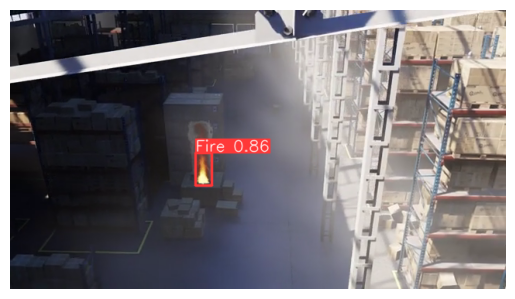

In [7]:

uploaded = files.upload()

# Get the path of the uploaded image
image_path = list(uploaded.keys())[0]

print("Image path:", image_path)
#output_dir="/content"

!yolo predict model={model_path} source={image_path} project={output}

#image = Image.open("/content/result/predict/"+image_path)
last_directory_path = get_last_directory_path()

test = image_path.split(".")
if test[1] != "mp4":
  image = Image.open(last_directory_path+"/"+image_path)

  # Display the image using matplotlib
  plt.imshow(image)
  plt.axis('off')  # Optional: Turn off axis
  plt.show()
else:
  Video(last_directory_path+"/"+image_path)

In [ ]:
from IPython.display import HTML

HTML("""
    <video width="320" height="240" controls>
        <source src="/content/drive/MyDrive/path/to/video.mp4" type="video/mp4">
    </video>
""")
